In [ ]:
"""
    Instruções:
        1- Plote neste notebook os gráficos, mapas e visualizações (interativas ou não) que você acha que fazem sentido para o desafio.
"""

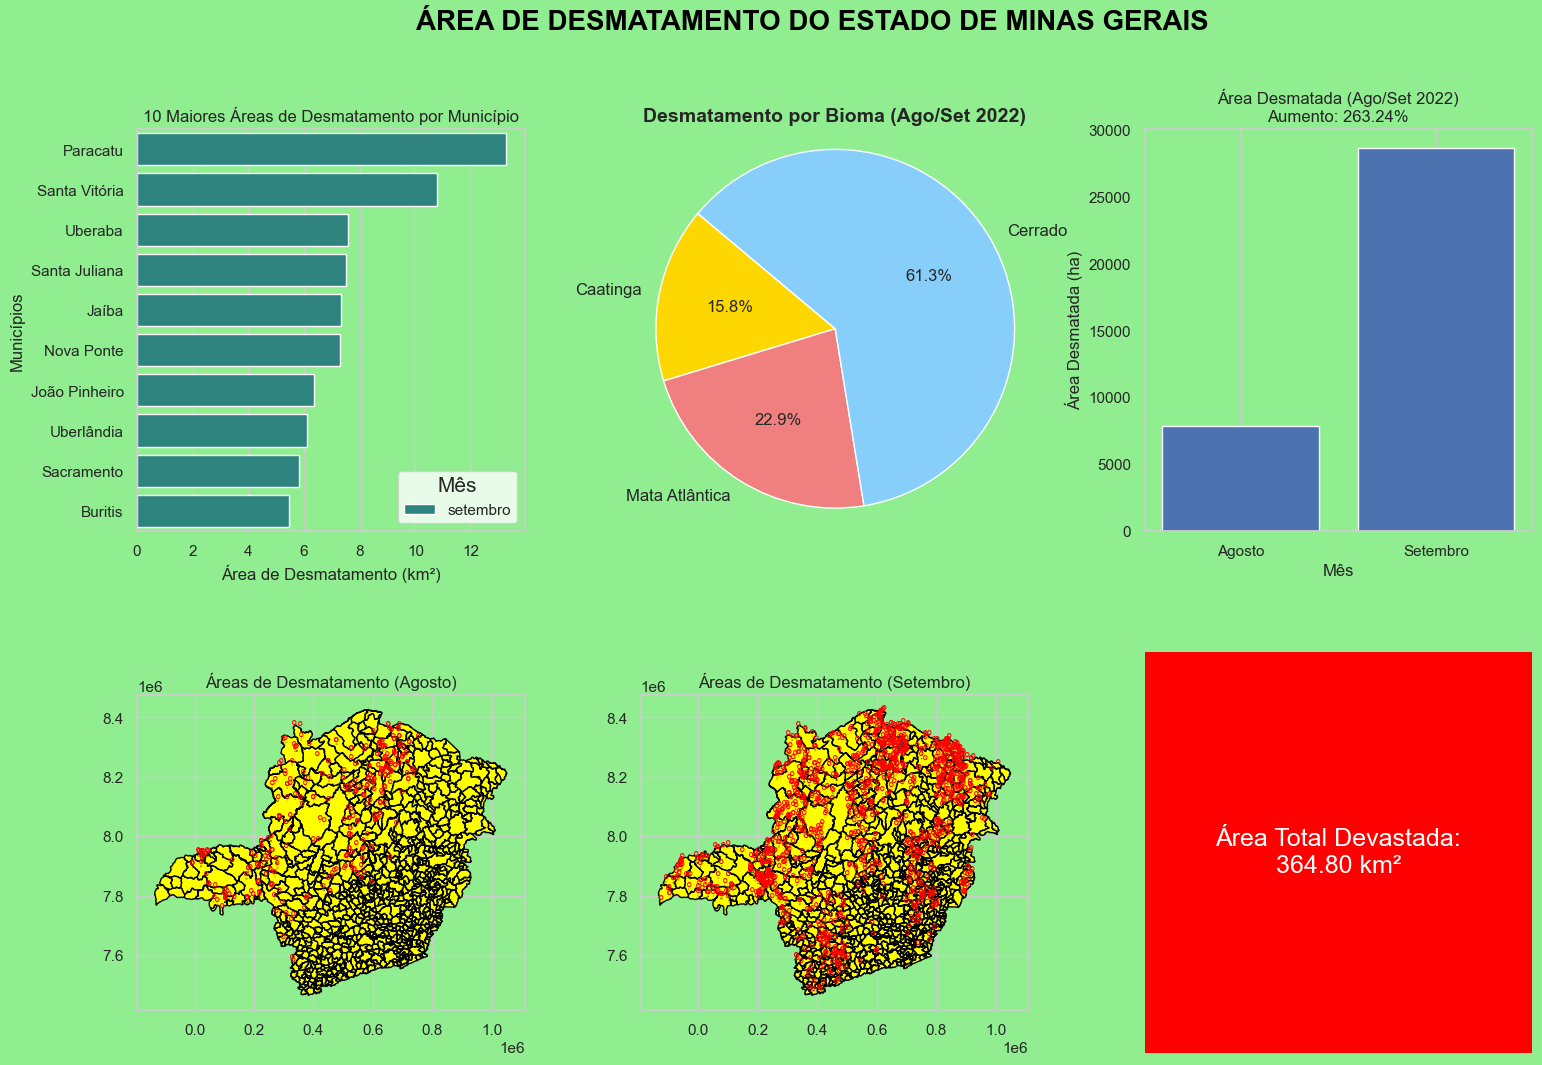

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Ler os dados do CSV
resultado_final = pd.read_csv('dados/desmatamento_por_municipio.csv')
desmatamento_por_bioma = pd.read_csv('dados/desmatamento_por_bioma.csv')
df = pd.read_csv('dados/desmatamento_total_agosto_setembro.csv')

# Ler os dados geoespaciais
minas_gerais = gpd.read_file('dados/municipios-mg.geojson')
areas_desmatamento = gpd.read_file('dados/focos-desmatamento-mg.geojson')

# Converter datas para formato datetime
areas_desmatamento['Data Final'] = pd.to_datetime(areas_desmatamento['Data Final'], format='%d/%m/%Y', errors='coerce')

# Definir os períodos de agosto e setembro de 2022
agosto_inicio = pd.to_datetime('2022-08-01')
agosto_final = pd.to_datetime('2022-08-31')
setembro_inicio = pd.to_datetime('2022-09-01')
setembro_final = pd.to_datetime('2022-09-30')

# Filtrar os dados para agosto e setembro de 2022
gdf_agosto = areas_desmatamento[(areas_desmatamento['Data Final'] >= agosto_inicio) & (areas_desmatamento['Data Final'] <= agosto_final)]
gdf_setembro = areas_desmatamento[(areas_desmatamento['Data Final'] >= setembro_inicio) & (areas_desmatamento['Data Final'] <= setembro_final)]

# Configurar o estilo do seaborn
sns.set(style="whitegrid")

# Criar uma figura de subplot com 2 linhas e 3 colunas
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Título do dashboard
fig.suptitle('ÁREA DE DESMATAMENTO DO ESTADO DE MINAS GERAIS', fontsize=20, fontweight='bold', color='black')

# Fundo verde claro para o dashboard
fig.patch.set_facecolor('lightgreen')

# Plot 1: 10 Maiores Áreas de Desmatamento por Município (Diminuído)
top_10_resultados = resultado_final.head(10)
sns.barplot(x="area_km2", y="Municípios", hue="Mes", data=top_10_resultados, palette="viridis", ax=axs[0, 0])
axs[0, 0].set_title("10 Maiores Áreas de Desmatamento por Município")
axs[0, 0].set_xlabel("Área de Desmatamento (km²)")
axs[0, 0].set_ylabel("Municípios")
axs[0, 0].legend(title="Mês", title_fontsize='15')
axs[0, 0].set_facecolor('lightgreen')

# Plot 2: Desmatamento por Bioma em Minas Gerais (Gráfico de Pizza) (Diminuído)
cores = ['gold', 'lightcoral', 'lightskyblue']
axs[0, 1].pie(desmatamento_por_bioma['Km2'], labels=desmatamento_por_bioma['Bioma'], autopct='%1.1f%%', colors=cores,
              startangle=140, textprops={'fontsize': 12}, radius=0.7)
axs[0, 1].set_title("Desmatamento por Bioma (Ago/Set 2022)", fontsize=14, fontweight='bold')
axs[0, 1].axis('equal')
axs[0, 1].set_facecolor('lightgreen')

# Plot 3: Área Desmatada em Agosto e Setembro de 2022 (Barras) (Diminuído)
area_agosto = df.at[0, 'Área Desmatada em Agosto de 2022(ha)']
area_setembro = df.at[0, 'Área Desmatada em Setembro de 2022(ha)']
diferenca_percentual = ((area_setembro - area_agosto) / area_agosto) * 100
valores = [area_agosto, area_setembro]
meses = ['Agosto', 'Setembro']
axs[0, 2].bar(meses, valores)
axs[0, 2].set_xlabel('Mês')
axs[0, 2].set_ylabel('Área Desmatada (ha)')
axs[0, 2].set_title('Área Desmatada (Ago/Set 2022)\nAumento: {:.2f}%'.format(diferenca_percentual))
axs[0, 2].grid(axis='y')
axs[0, 2].set_facecolor('lightgreen')

# Plot 4: Áreas de Desmatamento em Minas Gerais (Agosto e Setembro) (Tamanho Normal)
minas_gerais.plot(ax=axs[1, 0], color='yellow', edgecolor='black')
buffered_areas_agosto = gdf_agosto.copy()
buffered_areas_agosto['geometry'] = buffered_areas_agosto.buffer(0.9)
buffered_areas_agosto.plot(ax=axs[1, 0], color='red', alpha=0.7, edgecolor='black')
for x, y in zip(buffered_areas_agosto.geometry.centroid.x, buffered_areas_agosto.geometry.centroid.y):
    axs[1, 0].text(x, y, "°", fontsize=12, ha='center', va='center', color='red')
axs[1, 0].set_title('Áreas de Desmatamento (Agosto)')
axs[1, 0].set_facecolor('lightgreen')

minas_gerais.plot(ax=axs[1, 1], color='yellow', edgecolor='black')
buffered_areas_setembro = gdf_setembro.copy()
buffered_areas_setembro['geometry'] = buffered_areas_setembro.buffer(0.9)
buffered_areas_setembro.plot(ax=axs[1, 1], color='red', alpha=0.7, edgecolor='black')
for x, y in zip(buffered_areas_setembro.geometry.centroid.x, buffered_areas_setembro.geometry.centroid.y):
    axs[1, 1].text(x, y, "°", fontsize=12, ha='center', va='center', color='red')
axs[1, 1].set_title('Áreas de Desmatamento (Setembro)')
axs[1, 1].set_facecolor('lightgreen')

# Calcular a área total devastada em km² para ambos os meses
area_total_km2 = (df['Área Desmatada em Agosto de 2022(ha)'].sum() + df['Área Desmatada em Setembro de 2022(ha)'].sum()) / 100  # Converter ha para km²

# Criar um texto com a informação da área total devastada para ambos os meses
texto = 'Área Total Devastada:\n{:.2f} km²'.format(area_total_km2)

# Crie um retângulo vermelho como fundo
axs[1, 2].add_patch(plt.Rectangle((0, 0), 1, 1, color='red'))

# Adicione o texto com a mesma formatação
axs[1, 2].text(0.5, 0.5, texto, fontsize=18, ha='center', va='center', color='white')

# Remova os eixos
axs[1, 2].axis('off')
axs[1, 2].set_facecolor('lightgreen')

# Remover escala (rótulos com "°")
axs[1, 2].set_xticks([])
axs[1, 2].set_yticks([])
axs[1, 2].set_xticklabels([])
axs[1, 2].set_yticklabels([])

# Remover o espaço em branco entre os subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Exibir o dashboard
plt.show()


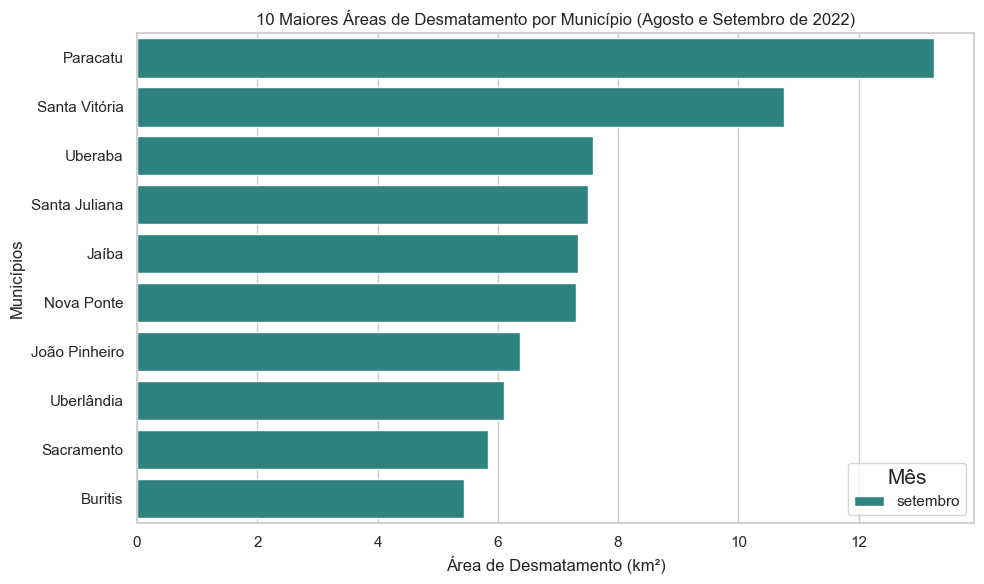

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lendo o arquivo CSV
resultado_final = pd.read_csv('dados/desmatamento_por_municipio.csv')

# Filtrando os 5 primeiros resultados
top_5_resultados = resultado_final.head(10)

# Configurando o estilo do gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Criando o gráfico de barras
sns.barplot(x="area_km2", y="Municípios", hue="Mes", data=top_5_resultados, palette="viridis")

# Configurando os títulos e rótulos dos eixos
plt.title("10 Maiores Áreas de Desmatamento por Município (Agosto e Setembro de 2022)")
plt.xlabel("Área de Desmatamento (km²)")
plt.ylabel("Municípios")

# Exibindo o gráfico
plt.legend(title="Mês", title_fontsize='15')
plt.tight_layout()
plt.show()


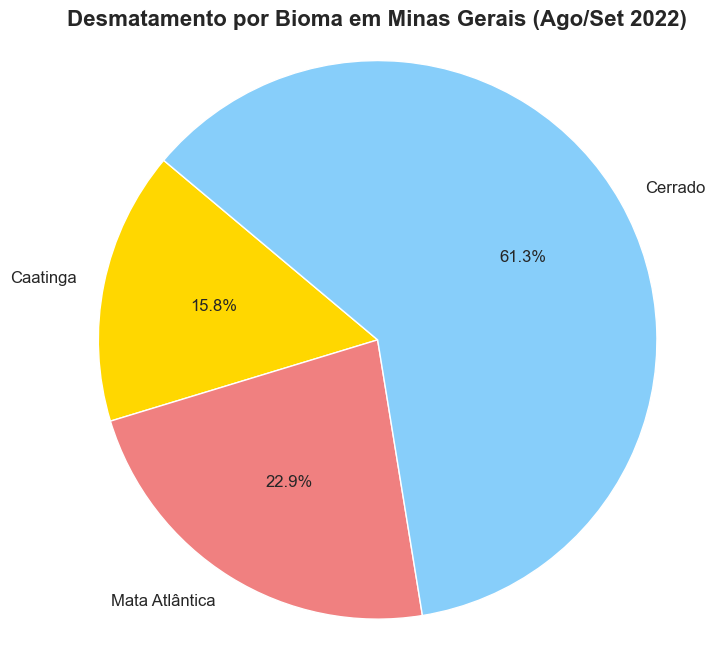

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Lendo o arquivo CSV
desmatamento_por_bioma = pd.read_csv('dados/desmatamento_por_bioma.csv')

# Configurando as cores das fatias do gráfico
cores = ['gold', 'lightcoral', 'lightskyblue']

# Criando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(desmatamento_por_bioma['Km2'], labels=desmatamento_por_bioma['Bioma'], autopct='%1.1f%%', colors=cores, startangle=140,
        textprops={'fontsize': 12}, radius=0.7)  # Ajuste o valor de radius conforme necessário

# Defina o título com tamanho e peso maiores
plt.title("Desmatamento por Bioma em Minas Gerais (Ago/Set 2022)", fontsize=16, fontweight='bold')

# Exibindo o gráfico de pizza
plt.axis('equal')  # Garante que o gráfico de pizza seja circular
plt.show()



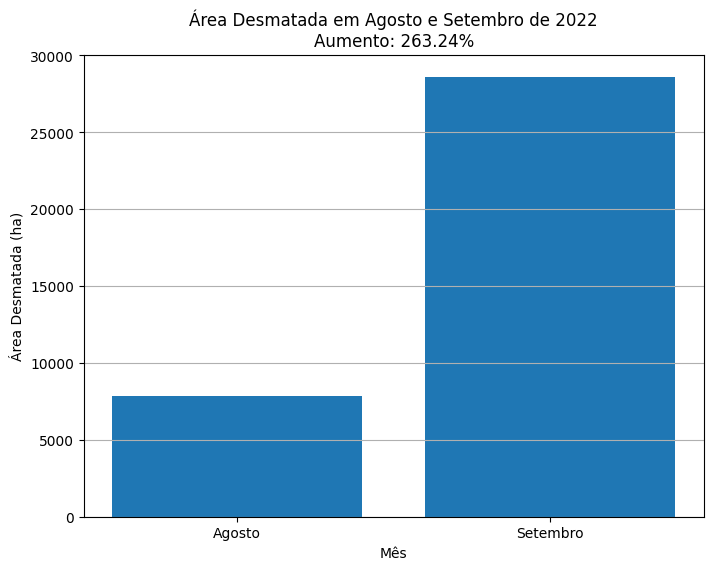

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
df = pd.read_csv('dados/desmatamento_total_agosto_setembro.csv')
# Extrair os valores de agosto e setembro
# Extrair os valores de agosto e setembro
area_agosto = df.at[0, 'Área Desmatada em Agosto de 2022(ha)']
area_setembro = df.at[0, 'Área Desmatada em Setembro de 2022(ha)']

# Calcular a diferença em porcentagem entre agosto e setembro
diferenca_percentual = ((area_setembro - area_agosto) / area_agosto) * 100

# Criar uma lista com os valores de agosto e setembro
valores = [area_agosto, area_setembro]
meses = ['Agosto', 'Setembro']

# Plotar os valores lado a lado
plt.figure(figsize=(8, 6))
plt.bar(meses, valores)
plt.xlabel('Mês')
plt.ylabel('Área Desmatada (ha)')
plt.title('Área Desmatada em Agosto e Setembro de 2022\nAumento: {:.2f}%'.format(diferenca_percentual))
plt.grid(axis='y')
plt.show()

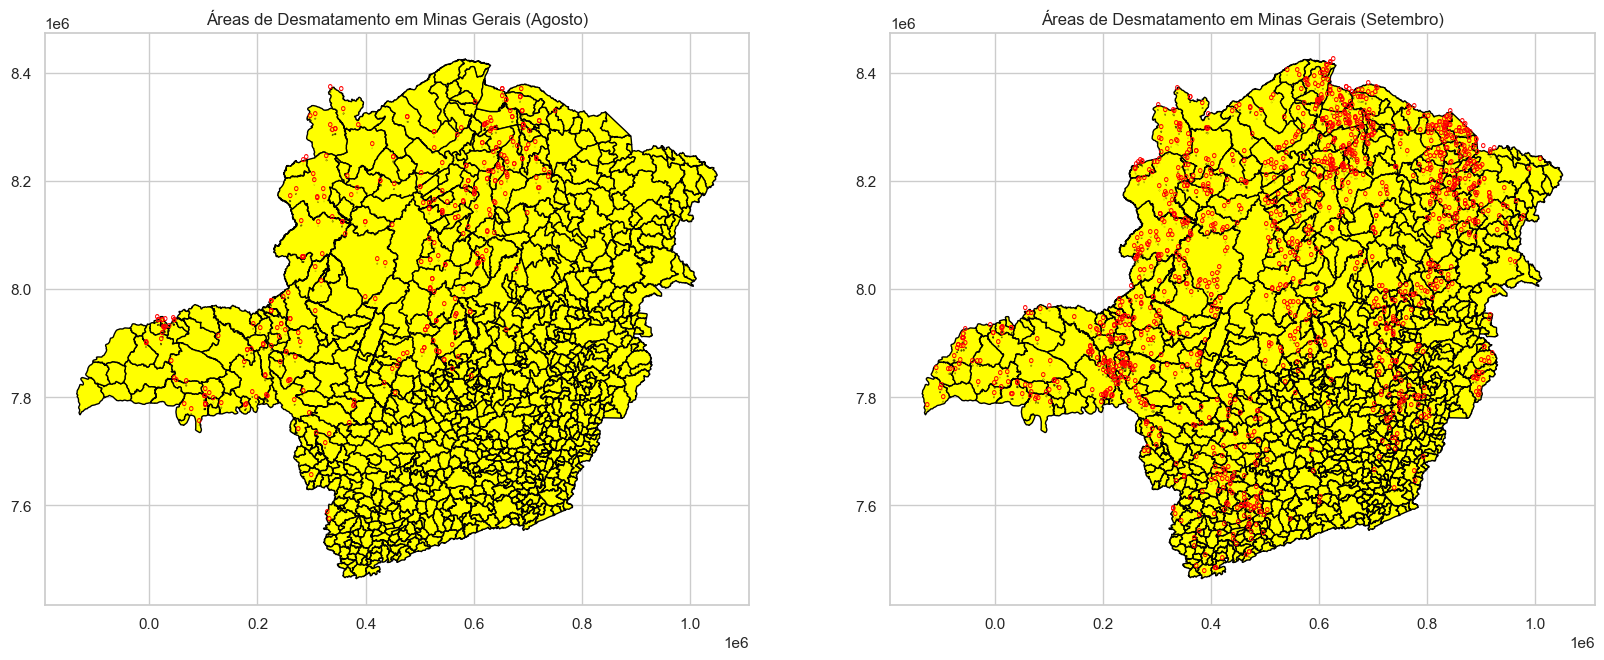

In [39]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Carregue o polígono do estado de Minas Gerais
minas_gerais = gpd.read_file('dados/municipios-mg.geojson')

# Carregue o GeoJSON das áreas de desmatamento
areas_desmatamento = gpd.read_file('dados/focos-desmatamento-mg.geojson')

# Converter as datas para o formato datetime
areas_desmatamento['Data Final'] = pd.to_datetime(areas_desmatamento['Data Final'], format='%d/%m/%Y', errors='coerce')

# Definir os períodos de agosto e setembro de 2022
agosto_inicio = pd.to_datetime('2022-08-01')
agosto_final = pd.to_datetime('2022-08-31')
setembro_inicio = pd.to_datetime('2022-09-01')
setembro_final = pd.to_datetime('2022-09-30')

# Filtrar os dados para agosto e setembro de 2022
gdf_agosto = areas_desmatamento[(areas_desmatamento['Data Final'] >= agosto_inicio) & (areas_desmatamento['Data Final'] <= agosto_final)]
gdf_setembro = areas_desmatamento[(areas_desmatamento['Data Final'] >= setembro_inicio) & (areas_desmatamento['Data Final'] <= setembro_final)]

# Crie um gráfico com dois subplots (um para agosto e outro para setembro)
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Adicione o polígono de Minas Gerais a ambos os subplots com cor amarela
minas_gerais.plot(ax=axs[0], color='yellow', edgecolor='black')
minas_gerais.plot(ax=axs[1], color='yellow', edgecolor='black')

# Crie um buffer de 100 km em torno dos pontos de desmatamento para agosto
buffered_areas_agosto = gdf_agosto.copy()
buffered_areas_agosto['geometry'] = buffered_areas_agosto.buffer(0.9)  # 0.9 graus ~ 100 km

# Crie um buffer de 100 km em torno dos pontos de desmatamento para setembro
buffered_areas_setembro = gdf_setembro.copy()
buffered_areas_setembro['geometry'] = buffered_areas_setembro.buffer(0.9)  # 0.9 graus ~ 100 km

# Plote as áreas de desmatamento com os buffers como círculos vermelhos para agosto
buffered_areas_agosto.plot(ax=axs[0], color='red', alpha=0.7, edgecolor='black')

# Plote as áreas de desmatamento com os buffers como círculos vermelhos para setembro
buffered_areas_setembro.plot(ax=axs[1], color='red', alpha=0.7, edgecolor='black')

# Adicione rótulos "°" para cada área de desmatamento em ambos os subplots
for x, y in zip(buffered_areas_agosto.geometry.centroid.x,
                buffered_areas_agosto.geometry.centroid.y):
    axs[0].text(x, y, "°", fontsize=12, ha='center', va='center', color='red')

for x, y in zip(buffered_areas_setembro.geometry.centroid.x,
                buffered_areas_setembro.geometry.centroid.y):
    axs[1].text(x, y, "°", fontsize=12, ha='center', va='center', color='red')

# Defina os títulos dos subplots
axs[0].set_title('Áreas de Desmatamento em Minas Gerais (Agosto)')
axs[1].set_title('Áreas de Desmatamento em Minas Gerais (Setembro)')

# Exiba o gráfico com ambos os subplots
plt.show()



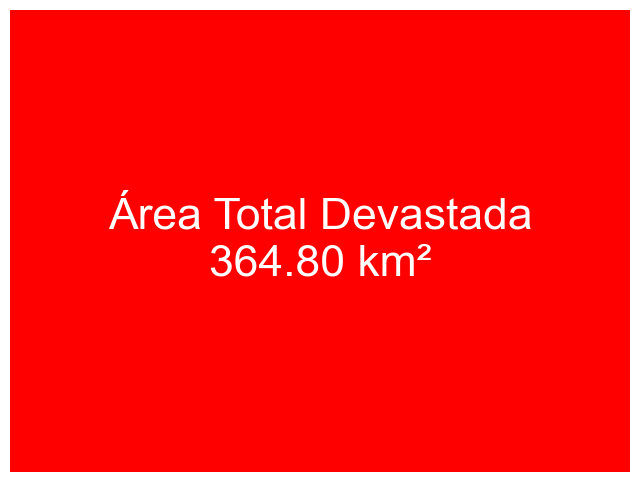

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Ler o arquivo CSV com os dados
dados_bioma = pd.read_csv('dados/desmatamento_por_bioma.csv')

# Calcular a área total devastada em km²
area_total_km2 = dados_bioma['Km2'].sum()

# Criar uma figura vazia
fig, ax = plt.subplots(figsize=(8, 6))

# Adicionar um retângulo vermelho como fundo
ax.add_patch(plt.Rectangle((0, 0), 1, 1, color='red'))

# Adicionar um quadrado de texto com a informação da área total devastada
texto = 'Área Total Devastada\n{:.2f} km²'.format(area_total_km2)
ax.text(0.5, 0.5, texto, ha='center', va='center', fontsize=32, color='white')

# Remover os eixos
ax.axis('off')

# Exibir a figura
plt.show()
